In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Projects/ToshkentUyNarxlari/tashkent_house_data.csv', index_col=0)
df = df.drop('location', axis=1)

In [8]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   rooms       7565 non-null   int64 
 2   size        7565 non-null   object
 3   level       7565 non-null   int64 
 4   max_levels  7565 non-null   int64 
 5   price       7565 non-null   object
dtypes: int64(3), object(3)
memory usage: 413.7+ KB


In [10]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['district'] = ord_enc.fit_transform(df[['district']])
df

,district,rooms,size,level,max_levels,price
0,8.0,3,57,4,4,52000
1,9.0,2,52,4,5,56000
2,6.0,2,42,4,4,37000
3,6.0,3,65,1,4,49500
4,6.0,3,70,3,5,55000
...,...,...,...,...,...,...
7560,11.0,1,38,5,5,24500
7561,11.0,2,49,1,4,32000
7562,7.0,2,64,3,9,40000
7563,2.0,1,18,1,4,11000


In [15]:
df['district'].unique()

array([ 8.,  9.,  6.,  5.,  2., 11.,  1.,  7.,  3.,  4., 10.,  0.])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7565 non-null   float64
 1   rooms       7565 non-null   int64  
 2   size        7565 non-null   object 
 3   level       7565 non-null   int64  
 4   max_levels  7565 non-null   int64  
 5   price       7565 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 413.7+ KB


In [20]:
df['price'].replace(to_replace='Договорная', value=np.nan, inplace=True)

In [22]:
df['size'].replace(to_replace='Площадьземли:1сот', value=np.nan, inplace=True)

In [23]:
df['price'] = df['price'].astype(float)
df['size'] = df['size'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7565 non-null   float64
 1   rooms       7565 non-null   int64  
 2   size        7564 non-null   float64
 3   level       7565 non-null   int64  
 4   max_levels  7565 non-null   int64  
 5   price       7466 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 413.7 KB


In [26]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
rooms         0.056176
max_levels    0.011168
size          0.001106
district     -0.003035
level        -0.003454
dtype: float64

In [30]:
df.groupby(['district','rooms']).median()

size  level  max_levels     price
district rooms                                    
0.0      1       41.0    2.0         2.0   19000.0
         2       30.0    1.0         4.0   26100.0
         3       71.2    6.0         9.0   28100.0
         4       94.0    9.0         9.0   40000.0
1.0      1       42.0    4.0         6.0   46500.0
...               ...    ...         ...       ...
11.0     3       75.0    4.0         6.0   46500.0
         4      100.0    4.0         5.0   63500.0
         5      133.0    3.0         8.0   88000.0
         6      215.0    4.0         5.5  176000.0
         7      360.0    5.0         6.0  300000.0

[81 rows x 4 columns]

<Axes: xlabel='district', ylabel='count'>

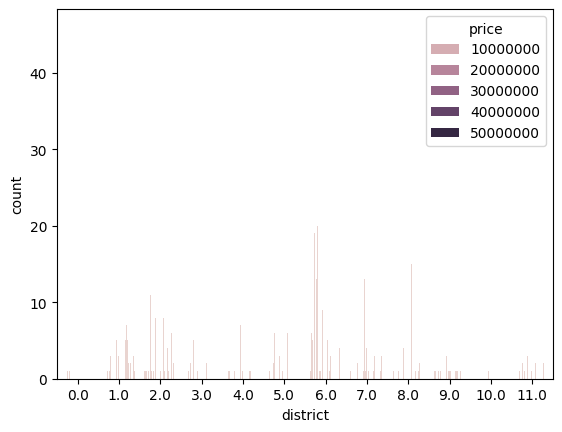

In [28]:
sns.countplot(data=df, x='district', hue='price')

In [31]:
df

,district,rooms,size,level,max_levels,price
0,8.0,3,57.0,4,4,52000.0
1,9.0,2,52.0,4,5,56000.0
2,6.0,2,42.0,4,4,37000.0
3,6.0,3,65.0,1,4,49500.0
4,6.0,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,11.0,1,38.0,5,5,24500.0
7561,11.0,2,49.0,1,4,32000.0
7562,7.0,2,64.0,3,9,40000.0
7563,2.0,1,18.0,1,4,11000.0


In [32]:
df.isnull().sum()

district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

In [33]:
df.isnull().sum()*100/df.shape[0]

district      0.000000
rooms         0.000000
size          0.013219
level         0.000000
max_levels    0.000000
price         1.308658
dtype: float64

In [34]:
df = df.dropna()

In [35]:
df

,district,rooms,size,level,max_levels,price
0,8.0,3,57.0,4,4,52000.0
1,9.0,2,52.0,4,5,56000.0
2,6.0,2,42.0,4,4,37000.0
3,6.0,3,65.0,1,4,49500.0
4,6.0,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,11.0,1,38.0,5,5,24500.0
7561,11.0,2,49.0,1,4,32000.0
7562,7.0,2,64.0,3,9,40000.0
7563,2.0,1,18.0,1,4,11000.0


In [38]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
rooms         0.056161
max_levels    0.011175
size          0.001106
district     -0.003067
level        -0.003449
dtype: float64

In [39]:
df.isnull().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [41]:
X = df.drop('price', axis=1)
Y = df['price']

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=47)

In [45]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)


LinearRegression()

In [47]:
y_prediction = LR_model.predict(x_test)
y_prediction

array([40093.99287862, 67378.35128163, 99829.78157116, ...,
       74000.93571574, 40651.30047007, 87359.33366695])

In [51]:
from sklearn.metrics import mean_absolute_error
mse_lr = mean_absolute_error(y_prediction, y_test)
mse_lr

70386.47208343649

In [58]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
y_prediction = RF_model.predict(x_test)
y_prediction

array([37284.791457  , 93398.16333333, 70510.83285714, ...,
       36590.08      , 41572.48045011, 90075.66666667])

In [62]:
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_prediction, y_test)
np.sqrt(mse_rf)

1408058.6570782713

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, X, Y, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)

In [64]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [65]:
display_scores(RF_rmse_scores)

Scores: [  69343.7318198   464661.60158889  148535.33059109   77393.8712631
 1122840.07346083   94545.18680087  407663.72649867 1903073.54495124
  534072.72708425  678779.52142497]
Mean: 550090.9315483689
Std.dev: 550121.2370008171


In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR_model, X, Y, scoring="neg_mean_absolute_error", cv=10)
LR_rmse_scores = np.abs(scores)

In [79]:
display_scores(LR_rmse_scores)

Scores: [30169.27700999 28588.36167024 36117.46447056 27717.53896239
 29886.84123941 29067.42733184 29726.82232481 92781.07980444
 37525.86254801 65245.97431937]
Mean: 40682.664968105986
Std.dev: 20358.78062694994
